# Finding whether there is a strong linear relationship between features and week rents

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols, glm

In [271]:
train_history = pd.read_csv('../data/raw/2017_2022_house_data_final.csv')

In [272]:
train_history = train_history.drop(columns=['Unnamed: 0'])

In [273]:
train_history.dtypes

name                      object
years                      int64
property_type             object
coordinates               object
postcode                   int64
sa2_coor                  object
closest_sa2               object
bed                      float64
bath                     float64
car                      float64
Income                   float64
Population               float64
week_rent                 object
real_school_distance      object
real_school_duration      object
real_station_distance     object
real_station_duration     object
Hospital num             float64
dtype: object

In [275]:
train_history = train_history[train_history.real_school_distance != 'school_distance_txt']

In [277]:
train_history = train_history[train_history.week_rent != 'No Available']

In [278]:
# Change data type
train_history = train_history.astype({'closest_sa2': 'category','real_school_distance': 'float',
                      'real_school_duration': 'float','real_station_distance': 'float',
                     'real_station_duration': 'float','week_rent':'float'})

In [281]:
train_history.dtypes

name                       object
years                       int64
property_type              object
coordinates                object
postcode                    int64
sa2_coor                   object
closest_sa2              category
bed                       float64
bath                      float64
car                       float64
Income                    float64
Population                float64
week_rent                 float64
real_school_distance      float64
real_school_duration      float64
real_station_distance     float64
real_station_duration     float64
Hospital num              float64
dtype: object

In [283]:
# filter dataframe
COL_FILTER = ['years', 'postcode', 'closest_sa2', 'property_type',
              'bed', 'bath', 'car','Income','Population','week_rent',
             'real_school_distance','real_school_duration','real_station_distance',
             'real_station_duration','Hospital num']
df_filtered = train_history[COL_FILTER].reset_index(drop=True)

df_filtered.tail()

,years,postcode,closest_sa2,property_type,bed,bath,car,Income,Population,week_rent,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
28284,2022,3996,Wonthaggi - Inverloch,House,2.0000,1.0000,1.0000,"48,982.6762","26,149.6441",400.0000,0.6000,0.9000,118.0000,95.8000,0.0000
28285,2022,3996,Wonthaggi - Inverloch,House,4.0000,2.0000,nan,"48,982.6762","26,149.6441",550.0000,3.5000,5.0000,118.3000,96.5000,0.0000
28286,2022,3996,Wonthaggi - Inverloch,House,2.0000,1.0000,nan,"48,982.6762","26,149.6441",420.0000,1.0000,2.2000,118.8000,97.0000,0.0000
28287,2022,3996,Wonthaggi - Inverloch,House,2.0000,1.0000,1.0000,"48,982.6762","26,149.6441",370.0000,0.5000,1.3000,118.4000,97.0000,0.0000
28288,2022,3996,Wonthaggi - Inverloch,House,3.0000,2.0000,1.0000,"48,982.6762","26,149.6441",475.0000,0.1000,0.2000,118.0000,95.8000,0.0000


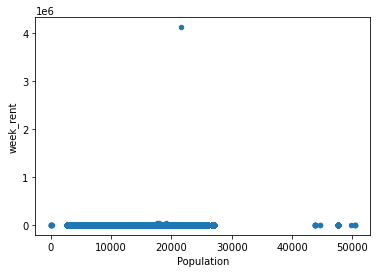

In [284]:
df_filtered[['Population', 'week_rent']].plot.scatter(x='Population', y='week_rent')
plt.show()

In [293]:
df_filtered.columns = df_filtered.columns.str.replace('Hospital num', 'Hospital_num')

# Building the full model

In [295]:
fit = ols(
    formula="week_rent ~ years + postcode +\
    bed + bath + car + Income + Population +\
    real_school_distance + real_school_duration + real_station_distance + real_station_duration + Hospital_num",
    data=df_filtered
).fit()

In [296]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:              week_rent   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     271.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:33:49   Log-Likelihood:            -1.9522e+05
No. Observations:               26557   AIC:                         3.905e+05
Df Residuals:                   26544   BIC:                         3.906e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8055.23

# Removing real_school_duration from our model

In [320]:
fit1 = ols(
    formula="week_rent ~  years + postcode +\
    bed + bath + car + Income + Population +\
    real_school_distance  + real_station_distance + real_station_duration + Hospital_num",
    data=df_filtered
).fit()

In [321]:
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              week_rent   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     296.3
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:40:01   Log-Likelihood:            -1.9523e+05
No. Observations:               26557   AIC:                         3.905e+05
Df Residuals:                   26545   BIC:                         3.906e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8100.59

In [322]:
[[fit.aic,fit1.aic],[fit.bic,fit1.bic]]

[[390475.9833076059, 390476.951083198],
 [390582.41493999615, 390575.19566694286]]

AIC increasing a little, while the decreasing more

# Removing real_school_distance from our model

In [323]:
fit2 = ols(
    formula="week_rent ~  years + postcode +\
    bed + bath + car + Income + Population +\
    real_station_distance + real_station_duration + Hospital_num",
    data=df_filtered
).fit()

In [324]:
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:              week_rent   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     325.7
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:41:07   Log-Likelihood:            -1.9523e+05
No. Observations:               26557   AIC:                         3.905e+05
Df Residuals:                   26546   BIC:                         3.906e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8026.89

In [326]:
[[fit.aic,fit1.aic,fit2.aic],[fit.bic,fit1.bic,fit2.bic]]

[[390475.9833076059, 390476.951083198, 390477.1020668547],
 [390582.41493999615, 390575.19566694286, 390567.15960195416]]

AIC increase 1, but BIC decrease more

# Removing Hospital_num from our model

In [327]:
fit3 = ols(
    formula="week_rent ~  years + postcode +\
    bed + bath + car + Income + Population +\
    real_station_distance + real_station_duration",
    data=df_filtered
).fit()

In [328]:
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:              week_rent   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     361.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:42:35   Log-Likelihood:            -1.9523e+05
No. Observations:               26557   AIC:                         3.905e+05
Df Residuals:                   26547   BIC:                         3.906e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8256.24

In [329]:
[[fit.aic,fit1.aic,fit2.aic,fit3.aic],[fit.bic,fit1.bic,fit2.bic,fit3.bic]]

[[390475.9833076059, 390476.951083198, 390477.1020668547, 390478.6271285666],
 [390582.41493999615,
  390575.19566694286,
  390567.15960195416,
  390560.49761502066]]

BIC keep decreasing, and the fit3 is contains our final feature

# Tried to fit the data in GLM

In [330]:
fitter = glm(
    formula="week_rent ~  years + postcode +\
    bed + bath + car + Income + Population +\
    real_station_distance + real_station_duration",
    data=df_filtered
).fit()

In [331]:
print(fitter.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              week_rent   No. Observations:                26557
Model:                            GLM   Df Residuals:                    26547
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                      1.4222e+05
Method:                          IRLS   Log-Likelihood:            -1.9523e+05
Date:                Fri, 07 Oct 2022   Deviance:                   3.7756e+09
Time:                        20:43:26   Pearson chi2:                 3.78e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8256.24

# Not Choosing the linear model to explain week rent, because the AIC, R-squared, and Deviance, all tends too large, so the feature we selected only have very weak linear relationship with week rent, so we choose other model to explain week rent